EDA tasks:

**Who Loses When Home Office Ends? A Data-Driven Look at Commuting, Care, and Work-Life Balance**

Research question:

Which demographic groups face the longest commuting times and have the lowest prevalence of remote work?

- Overall demographics (age, sex) of HO trends per year

- Overall demographics (age, sex) of commuting data trends in 2019

Start with:
1. Overall demographics (age, sex) of HO trends per year

Clean Data first!

In [300]:
import pandas as pd
import numpy as np

In [301]:
df_home_office = pd.read_excel(r"C:\Users\Olivia\Documents\Weiterbildung\Learning Material\Sus Tainability\Who_Loses_when_HO_ends_project\Home_Office_all_sheets_english.xlsx")

In [302]:
df_commuting_data = pd.read_csv(r"C:\Users\Olivia\Documents\Weiterbildung\Learning Material\Sus Tainability\Who_Loses_when_HO_ends_project\all_commuting_data_clean_wna.csv")

In [303]:
df_home_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   region     3780 non-null   object
 1   2015       3780 non-null   object
 2   2016       3780 non-null   object
 3   2017       3780 non-null   object
 4   2018       3780 non-null   object
 5   2019       3780 non-null   object
 6   2020       3780 non-null   object
 7   2021       3780 non-null   object
 8   2022       3780 non-null   object
 9   2023       3780 non-null   object
 10  2024       3780 non-null   object
 11  gender     3780 non-null   object
 12  age_group  3780 non-null   object
 13  children   3780 non-null   object
dtypes: object(14)
memory usage: 413.6+ KB


In [304]:
df_commuting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8750 entries, 0 to 8749
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               8750 non-null   object 
 1   0                    3042 non-null   float64
 2   1-9                  4194 non-null   float64
 3   1-14                 4852 non-null   float64
 4   1+                   5426 non-null   float64
 5   10-14                4372 non-null   float64
 6   15-19                4371 non-null   float64
 7   15-29                4953 non-null   float64
 8   20-29                4566 non-null   float64
 9   30-44                4568 non-null   float64
 10  30-59                4740 non-null   float64
 11  30+                  4868 non-null   float64
 12  45-59                3363 non-null   float64
 13  60+                  3629 non-null   float64
 14  No_response          2411 non-null   float64
 15  sheet_name           8750 non-null   o

1. For HO data we only have object as datatype - we will need to adjust this for any analysis.
2. Determine the null values and how to deal with them


In [305]:
( df_home_office == 0.0 ).any().any()

False

In [306]:
np.where(df_home_office == 0)

(array([], dtype=int64), array([], dtype=int64))

In [307]:
( df_commuting_data == 0 ).any().any()

False

In [308]:
np.where(df_commuting_data == 0)

(array([], dtype=int64), array([], dtype=int64))

Ok we don't have any 0 values within our data - so we can replace the ":" values and NA with 0 because they do not interfere with any "real" values

In [309]:
#drop columns (total 20 columns) with more than 5 NaN values
df_commuting_data.dropna(thresh=16, inplace=True)  # keep rows with at least 16 non-NaNs
# Fill the rest of the NaN values with 0
df_commuting_data.fillna(0, inplace=True)

In [310]:
#for the home office data replace ":" with 0
df_home_office = df_home_office.replace(":", 0)

C:\Users\Olivia\AppData\Local\Temp\ipykernel_17892\3905972031.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_home_office = df_home_office.replace(":", 0)


In [311]:
# Change years columns to numeric
for x in df_home_office.columns[1:11]:
    df_home_office[x] = pd.to_numeric(df_home_office[x], errors="coerce")
    #errors="coerce"="If something can't be converted, turn it into NaN instead of throwing an error."

In [312]:
df_home_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     3780 non-null   object 
 1   2015       3780 non-null   float64
 2   2016       3780 non-null   float64
 3   2017       3780 non-null   float64
 4   2018       3780 non-null   float64
 5   2019       3780 non-null   float64
 6   2020       3780 non-null   float64
 7   2021       3780 non-null   float64
 8   2022       3780 non-null   float64
 9   2023       3780 non-null   float64
 10  2024       3780 non-null   float64
 11  gender     3780 non-null   object 
 12  age_group  3780 non-null   object 
 13  children   3780 non-null   object 
dtypes: float64(10), object(4)
memory usage: 413.6+ KB


In [313]:
df_home_office

region  2015  2016  2017  2018  2019  \
0     European_Union_27_countries_from_2020   4.5   4.6   4.6   4.7   5.3   
1          Euro_area_20_countries_2015-2022   4.5   4.3   4.6   4.7   5.3   
2                                   Belgium   8.9   8.6   9.3   9.6  10.3   
3                                  Bulgaria   0.0   0.0   0.0   0.0   0.0   
4                                   Czechia   2.7   2.8   3.5   3.9   4.3   
...                                     ...   ...   ...   ...   ...   ...   
3775                 Bosnia and Herzegovina   0.0   0.0   0.0   0.0   0.0   
3776                             Montenegro   0.0   0.0   0.0   0.0   0.0   
3777                        North Macedonia   0.0   0.0   0.0   0.0   0.0   
3778                                 Serbia   0.0   0.0   0.0  14.6  24.6   
3779                                Türkiye   9.2   9.6   9.1  12.8  17.7   

      2020  2021  2022  2023  2024  gender age_group children  
0     10.3  12.4  11.1  10.4  10.0   total     18-24    total  
1     11.1  13.7  12.3  11.0  10.7   total     18-24    total  
2     13.3  16.0  11.9  11.3  11.2   total     18-24    total  
3      0.0   0.0   0.0   0.0   0.0   total     18-24    total  
4      4.8   7.3   6.5  10.2   8.4   total     18-24    total  
...    ...   ...   ...   ...   ...     ...       ...      ...  
3775   0.0   0.0   0.0   0.0   0.0  female       55+       3+  
3776   0.0   0.0   0.0   0.0   0.0  female       55+       3+  
3777   0.0   0.0   0.0   0.0   0.0  female       55+       3+  
3778  18.4   0.0   0.0   0.0   0.0  female       55+       3+  
3779  18.2  14.5   9.6  21.3   0.0  female       55+       3+  

[3780 rows x 14 columns]

In [ ]:
df_home_office.describe()

2015         2016         2017         2018         2019  \
count  3780.000000  3780.000000  3780.000000  3780.000000  3780.000000   
mean     11.182989    11.309048    11.419471    11.655159    12.418651   
std      11.614781    11.734703    11.776265    11.790009    12.418557   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.675000     0.700000     0.900000     0.900000     1.600000   
50%       7.300000     7.300000     7.300000     7.700000     8.500000   
75%      18.200000    17.700000    18.400000    19.500000    20.325000   
max      69.200000    50.700000    55.500000    65.400000    57.900000   

              2020         2021         2022         2023         2024  
count  3780.000000  3780.000000  3780.000000  3780.000000  3780.000000  
mean     15.054127    19.615979    17.849312    17.439180    17.828333  
std      13.965432    16.032752    15.701179    15.641628    16.372126  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       2.175000     6.800000     4.600000     3.700000     2.900000  
50%      11.700000    16.000000    13.500000    13.550000    14.100000  
75%      24.100000    29.800000    28.400000    27.900000    28.300000  
max      68.800000    71.500000    70.600000    63.600000   100.000000

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt

In [316]:
# Change into long format to have years as a variable
year_cols = df_home_office.columns[1:11] 

df_home_office_long= df_home_office.melt(
    id_vars=["region", "gender", "age_group", "children"],
    value_vars=year_cols,
    var_name="year",
    value_name="%Home_Office"
)

In [317]:
df_home_office_long.sort_values(by=["region"])

region  gender age_group children  year  %Home_Office
17877         Austria  female     18-64        0  2019          20.7
21369         Austria    male       55+        2  2020          40.6
21333         Austria    male       55+        1  2020          36.4
4989          Austria   total       55+        2  2016          34.6
21297         Austria    male       55+        0  2020          36.5
...               ...     ...       ...      ...   ...           ...
20118  United Kingdom   total       55+        2  2020           0.0
20154  United Kingdom   total       55+       3+  2020           0.0
20190  United Kingdom    male     18-24    total  2020           0.0
19902  United Kingdom   total     25-54        1  2020           0.0
17850  United Kingdom  female     18-64    total  2019          26.5

[37800 rows x 6 columns]

In [318]:
df_home_office_long.drop(columns=["children"], inplace=True)  # drop children column as it is not needed for the analysis

In [319]:
df_home_office_long

region  gender age_group  year  \
0      European_Union_27_countries_from_2020   total     18-24  2015   
1           Euro_area_20_countries_2015-2022   total     18-24  2015   
2                                    Belgium   total     18-24  2015   
3                                   Bulgaria   total     18-24  2015   
4                                    Czechia   total     18-24  2015   
...                                      ...     ...       ...   ...   
37795                 Bosnia and Herzegovina  female       55+  2024   
37796                             Montenegro  female       55+  2024   
37797                        North Macedonia  female       55+  2024   
37798                                 Serbia  female       55+  2024   
37799                                Türkiye  female       55+  2024   

       %Home_Office  
0               4.5  
1               4.5  
2               8.9  
3               0.0  
4               2.7  
...             ...  
37795           0.0  
37796           0.0  
37797           0.0  
37798           0.0  
37799           0.0  

[37800 rows x 5 columns]

In [320]:
df_home_office_long.age_group.unique()

array(['18-24', '18-64', '18+', '20-49', '25-49', '25-54', '55+'],
      dtype=object)

In [321]:
# getting rid of age groups that are not needed
df_home_office_long_age = df_home_office_long[~df_home_office_long['age_group'].isin(['18-64', '18+', '55+'])]
df_home_office_long_age

region  gender age_group  year  \
0      European_Union_27_countries_from_2020   total     18-24  2015   
1           Euro_area_20_countries_2015-2022   total     18-24  2015   
2                                    Belgium   total     18-24  2015   
3                                   Bulgaria   total     18-24  2015   
4                                    Czechia   total     18-24  2015   
...                                      ...     ...       ...   ...   
37615                 Bosnia and Herzegovina  female     25-54  2024   
37616                             Montenegro  female     25-54  2024   
37617                        North Macedonia  female     25-54  2024   
37618                                 Serbia  female     25-54  2024   
37619                                Türkiye  female     25-54  2024   

       %Home_Office  
0               4.5  
1               4.5  
2               8.9  
3               0.0  
4               2.7  
...             ...  
37615          25.1  
37616           0.0  
37617           0.0  
37618           6.2  
37619           0.0  

[21600 rows x 5 columns]

Lets see the %home office development for each country over the years

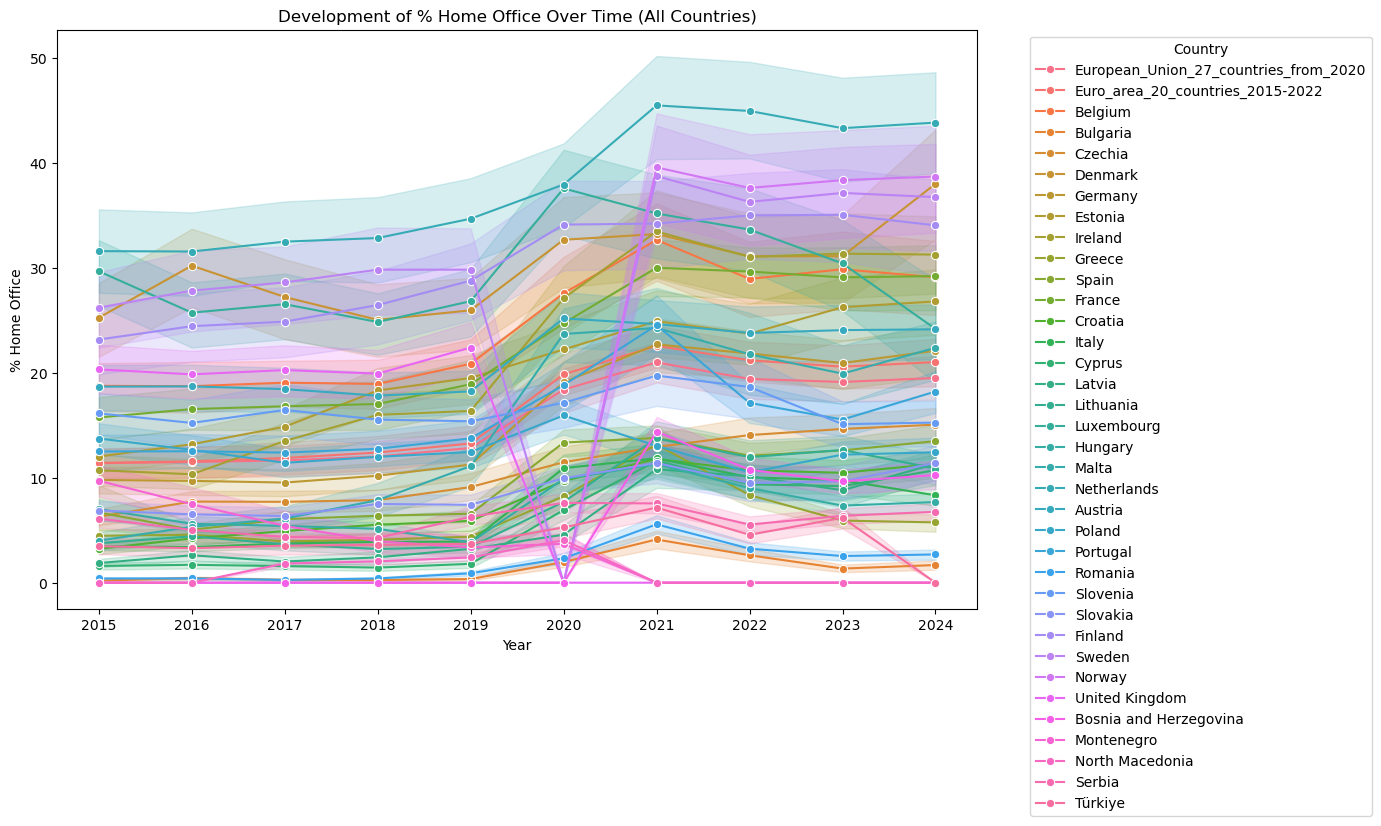

In [323]:
plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_home_office_long_age,
    x="year",
    y="%Home_Office",
    hue="region",
    marker="o"
)

plt.title("Development of % Home Office Over Time (All Countries)")
plt.ylabel("% Home Office")
plt.xlabel("Year")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

See if we can cluster countries with the higher %home_office

In [324]:
df_home_office.columns

Index(['region', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', '2024', 'gender', 'age_group', 'children'],
      dtype='object')

In [325]:
df_home_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     3780 non-null   object 
 1   2015       3780 non-null   float64
 2   2016       3780 non-null   float64
 3   2017       3780 non-null   float64
 4   2018       3780 non-null   float64
 5   2019       3780 non-null   float64
 6   2020       3780 non-null   float64
 7   2021       3780 non-null   float64
 8   2022       3780 non-null   float64
 9   2023       3780 non-null   float64
 10  2024       3780 non-null   float64
 11  gender     3780 non-null   object 
 12  age_group  3780 non-null   object 
 13  children   3780 non-null   object 
dtypes: float64(10), object(4)
memory usage: 413.6+ KB


In [ ]:
# only look at total gender, total children and total age group (18+)
df_home_office_cluster = df_home_office[
    df_home_office["age_group"].isin(["18+"]) &
    df_home_office["children"].isin(["total"]) &
    df_home_office["gender"].isin(["total"])]
df_home_office_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 360 to 395
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     36 non-null     object 
 1   2015       36 non-null     float64
 2   2016       36 non-null     float64
 3   2017       36 non-null     float64
 4   2018       36 non-null     float64
 5   2019       36 non-null     float64
 6   2020       36 non-null     float64
 7   2021       36 non-null     float64
 8   2022       36 non-null     float64
 9   2023       36 non-null     float64
 10  2024       36 non-null     float64
 11  gender     36 non-null     object 
 12  age_group  36 non-null     object 
 13  children   36 non-null     object 
dtypes: float64(10), object(4)
memory usage: 4.2+ KB


In [327]:
df_home_office_cluster

region  2015  2016  2017  2018  2019  \
360  European_Union_27_countries_from_2020  13.1  13.3  13.3  13.7  14.6   
361       Euro_area_20_countries_2015-2022  13.3  13.4  13.6  14.1  15.1   
362                                Belgium  22.6  23.0  23.7  23.0  25.0   
363                               Bulgaria   1.0   1.2   1.0   0.9   1.1   
364                                Czechia   7.9   9.1   9.5   9.7  10.4   
365                                Denmark  29.4  34.9  31.2  29.2  29.6   
366                                Germany  11.7  11.4  11.1  12.0  12.9   
367                                Estonia  13.0  15.0  16.0  19.3  19.5   
368                                Ireland  13.8  13.2  17.1  20.0  20.4   
369                                 Greece   5.6   6.0   5.5   5.1   5.2   
370                                  Spain   6.5   6.5   7.4   7.6   8.4   
371                                 France  19.8  20.7  20.7  21.1  23.2   
372                                Croatia   4.5   5.6   6.3   7.0   7.2   
373                                  Italy   4.5   4.4   4.7   5.0   4.8   
374                                 Cyprus   2.7   3.0   2.6   2.3   2.7   
375                                 Latvia   3.2   4.3   3.3   4.9   4.8   
376                              Lithuania   5.1   5.1   4.9   4.8   4.7   
377                             Luxembourg  34.1  30.9  30.8  28.7  31.4   
378                                Hungary   8.9   7.4   6.8   6.2   4.7   
379                                  Malta   5.1   6.5   7.6  10.0  11.8   
380                            Netherlands  35.7  36.0  36.8  37.0  38.5   
381                                Austria  22.8  22.8  22.3  22.3  22.7   
382                                 Poland  16.1  15.0  13.9  14.2  14.7   
383                               Portugal  14.1  14.3  14.3  14.8  15.7   
384                                Romania   0.7   0.7   0.6   0.7   1.3   
385                               Slovenia  19.0  17.7  18.2  17.9  17.9   
386                               Slovakia   8.9   8.4   8.5   9.1   9.7   
387                                Finland  26.8  27.6  27.8  30.2  32.1   
388                                 Sweden  28.4  31.5  33.1  33.8  35.1   
389                                 Norway   0.0   0.0   0.0   0.0   0.0   
390                         United Kingdom  24.8  24.3  24.6  24.3  27.0   
391                 Bosnia and Herzegovina   0.0   0.0   0.0   0.0   0.0   
392                             Montenegro  13.3  11.0  10.4   8.9   8.1   
393                        North Macedonia   0.0   0.0   2.4   2.8   2.9   
394                                 Serbia   7.4   6.4   5.6   5.9   8.0   
395                                Türkiye   2.9   2.7   2.9   3.0   3.2   

     2020  2021  2022  2023  2024 gender age_group children  
360  20.8  23.4  21.6  21.4  21.9  total       18+    total  
361  22.3  25.1  23.4  23.0  23.3  total       18+    total  
362  33.9  40.2  35.8  36.3  36.4  total       18+    total  
363   3.0   6.7   4.5   2.9   3.0  total       18+    total  
364  13.4  14.6  16.0  15.5  17.0  total       18+    total  
365  36.7  37.7  35.1  36.4  42.5  total       18+    total  
366  21.1  25.2  24.3  23.5  24.3  total       18+    total  
367  22.9  26.0  25.0  27.5  28.8  total       18+    total  
368  32.4  40.2  37.0  37.8  37.2  total       18+    total  
369  10.4  15.8  10.7   7.4   8.0  total       18+    total  
370  15.2  15.4  13.9  14.3  15.6  total       18+    total  
371  29.7  34.5  33.8  33.7  34.0  total       18+    total  
372  11.5  14.0  13.0  12.7  13.5  total       18+    total  
373  13.7  14.9  12.2  12.0  10.4  total       18+    total  
374   8.0  12.8  11.2  10.8  12.1  total       18+    total  
375   6.1  13.8  11.5  10.7  12.2  total       18+    total  
376   8.4  14.3  11.4  12.6  11.8  total       18+    total  
377  44.5  42.9  39.4  38.3  36.6  total       18+    total  
378  11.1  13.6  10.9   8.9   9.3  total     

In [328]:
# drop columns that are not needed for the analysis
df_home_office_cluster = df_home_office_cluster.drop(columns=['gender', 'age_group', 'children'])

In [329]:
# getting rid of regions that are not needed

df_home_office_cluster = df_home_office_cluster[~df_home_office_cluster["region"].isin(['European_Union_27_countries_from_2020', "Euro_area_20_countries_2015-2022"])]
df_home_office_cluster.groupby("region")
df_home_office_cluster

region  2015  2016  2017  2018  2019  2020  2021  2022  \
362                 Belgium  22.6  23.0  23.7  23.0  25.0  33.9  40.2  35.8   
363                Bulgaria   1.0   1.2   1.0   0.9   1.1   3.0   6.7   4.5   
364                 Czechia   7.9   9.1   9.5   9.7  10.4  13.4  14.6  16.0   
365                 Denmark  29.4  34.9  31.2  29.2  29.6  36.7  37.7  35.1   
366                 Germany  11.7  11.4  11.1  12.0  12.9  21.1  25.2  24.3   
367                 Estonia  13.0  15.0  16.0  19.3  19.5  22.9  26.0  25.0   
368                 Ireland  13.8  13.2  17.1  20.0  20.4  32.4  40.2  37.0   
369                  Greece   5.6   6.0   5.5   5.1   5.2  10.4  15.8  10.7   
370                   Spain   6.5   6.5   7.4   7.6   8.4  15.2  15.4  13.9   
371                  France  19.8  20.7  20.7  21.1  23.2  29.7  34.5  33.8   
372                 Croatia   4.5   5.6   6.3   7.0   7.2  11.5  14.0  13.0   
373                   Italy   4.5   4.4   4.7   5.0   4.8  13.7  14.9  12.2   
374                  Cyprus   2.7   3.0   2.6   2.3   2.7   8.0  12.8  11.2   
375                  Latvia   3.2   4.3   3.3   4.9   4.8   6.1  13.8  11.5   
376               Lithuania   5.1   5.1   4.9   4.8   4.7   8.4  14.3  11.4   
377              Luxembourg  34.1  30.9  30.8  28.7  31.4  44.5  42.9  39.4   
378                 Hungary   8.9   7.4   6.8   6.2   4.7  11.1  13.6  10.9   
379                   Malta   5.1   6.5   7.6  10.0  11.8  25.8  30.5  29.8   
380             Netherlands  35.7  36.0  36.8  37.0  38.5  41.7  50.5  49.8   
381                 Austria  22.8  22.8  22.3  22.3  22.7  29.9  29.0  28.1   
382                  Poland  16.1  15.0  13.9  14.2  14.7  18.5  15.6  12.5   
383                Portugal  14.1  14.3  14.3  14.8  15.7  22.2  25.5  18.7   
384                 Romania   0.7   0.7   0.6   0.7   1.3   3.1   6.6   4.3   
385                Slovenia  19.0  17.7  18.2  17.9  17.9  20.2  23.2  22.4   
386                Slovakia   8.9   8.4   8.5   9.1   9.7  11.7  15.2  13.2   
387                 Finland  26.8  27.6  27.8  30.2  32.1  39.3  41.0  41.1   
388                  Sweden  28.4  31.5  33.1  33.8  35.1   0.0  46.8  42.5   
389                  Norway   0.0   0.0   0.0   0.0   0.0   0.0  46.4  44.6   
390          United Kingdom  24.8  24.3  24.6  24.3  27.0   0.0   0.0   0.0   
391  Bosnia and Herzegovina   0.0   0.0   0.0   0.0   0.0   0.0  17.1  13.2   
392              Montenegro  13.3  11.0  10.4   8.9   8.1   9.4   0.0   0.0   
393         North Macedonia   0.0   0.0   2.4   2.8   2.9   4.4   0.0   0.0   
394                  Serbia   7.4   6.4   5.6   5.9   8.0   9.9   9.2   6.8   
395                 Türkiye   2.9   2.7   2.9   3.0   3.2   4.8   6.8   4.2   

     2023  2024  
362  36.3  36.4  
363   2.9   3.0  
364  15.5  17.0  
365  36.4  42.5  
366  23.5  24.3  
367  27.5  28.8  
368  37.8  37.2  
369   7.4   8.0  
370  14.3  15.6  
371  33.7  34.0  
372  12.7  13.5  
373  12.0  10.4  
374  10.8  12.1  
375  10.7  12.2  
376  12.6  11.8  
377  38.3  36.6  
378   8.9   9.3  
379  24.2  25.5  
380  48.5  48.7  
381  28.6  28.7  
382  14.0  15.0  
383  17.7  20.7  
384   3.3   3.5  
385  18.5  19.1  
386  12.8  13.6  
387  41.2  40.3  
388  44.3  44.4  
389  44.4  44.4  
390   0.0   0.0  
391  12.5  12.4  
392   0.0   0.0  
393   0.0   0.0  
394   7.4   7.6  
395   5.8   0.0

In [330]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Spaltennamen der Jahre 2015–2023 erstellen (als Strings)
year_cols = [str(y) for y in range(2015, 2024)]

# Nur die Jahrgangsspalten aus dem gefilterten DataFrame auswählen
X = df_home_office_cluster[year_cols]

# Daten standardisieren (Mittelwert=0, Standardabweichung=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means-Clustering mit 4 Clustern ausführen
kmeans = KMeans(n_clusters=4, random_state=50)
df_home_office_cluster['cluster'] = kmeans.fit_predict(X_scaled)

print(df_home_office_cluster[['region', 'cluster']].head(10))

       region  cluster
362   Belgium        1
363  Bulgaria        0
364   Czechia        0
365   Denmark        2
366   Germany        3
367   Estonia        3
368   Ireland        1
369    Greece        0
370     Spain        0
371    France        1


c:\Users\Olivia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [331]:
df_home_office_cluster.cluster.unique()

array([1, 0, 2, 3])

In [332]:
df_home_office_cluster.to_excel(r"C:\Users\Olivia\Documents\Weiterbildung\Learning Material\Sus Tainability\Who_Loses_when_HO_ends_project\EDA\df_home_office_cluster.xlsx", index=False)

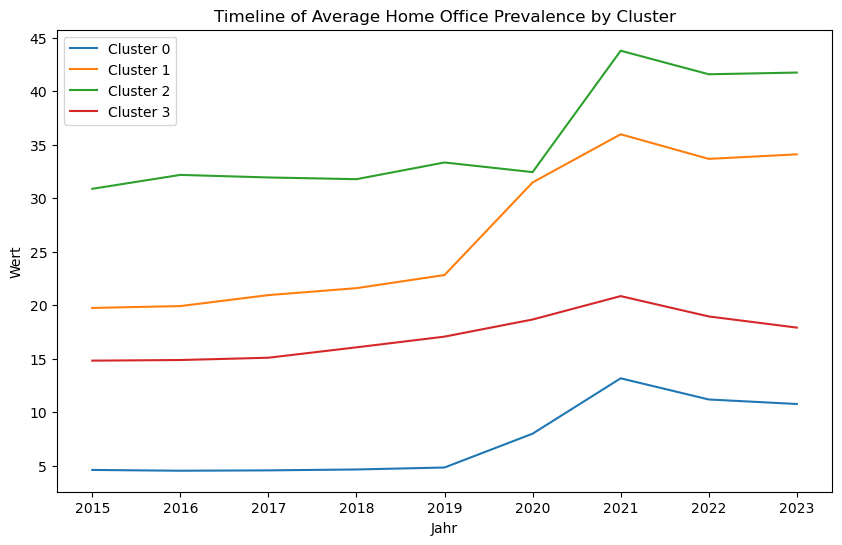

In [333]:
# Mittelwert je Cluster für jede Jahres-Spalte
cluster_means = df_home_office_cluster.groupby('cluster')[year_cols].mean()

plt.figure(figsize=(10,6))
for cluster_id in cluster_means.index:
    plt.plot(year_cols, cluster_means.loc[cluster_id], label=f'Cluster {cluster_id}')
plt.xlabel('Jahr')
plt.ylabel('Wert')
plt.title('Timeline of Average Home Office Prevalence by Cluster')
plt.legend()
plt.show()

We created 4 cluster which represent different %HO prevalence in different regions over the years 2015 to 2024

Without Clustering the Home office trends within each Country differ quite a lot

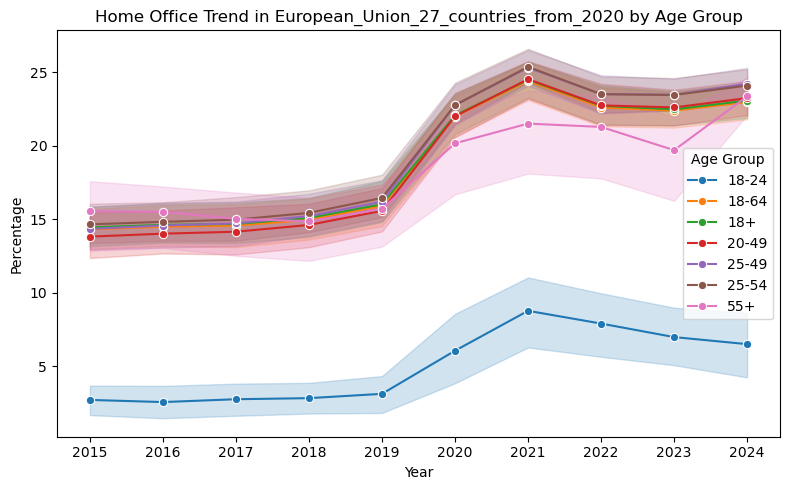

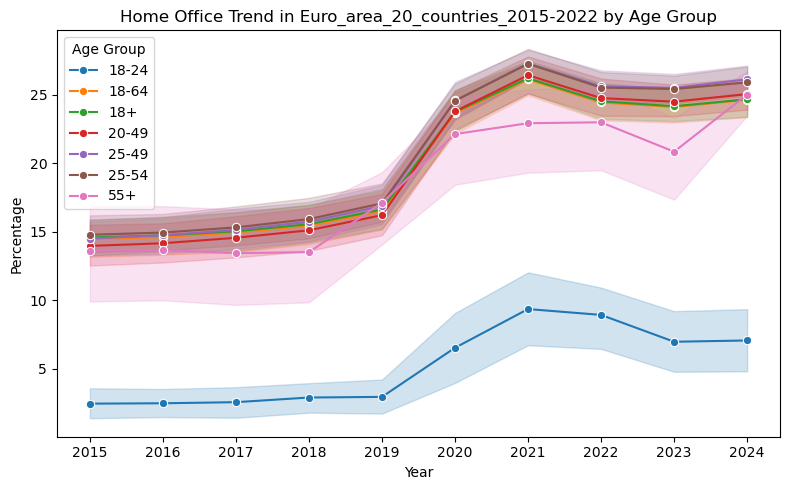

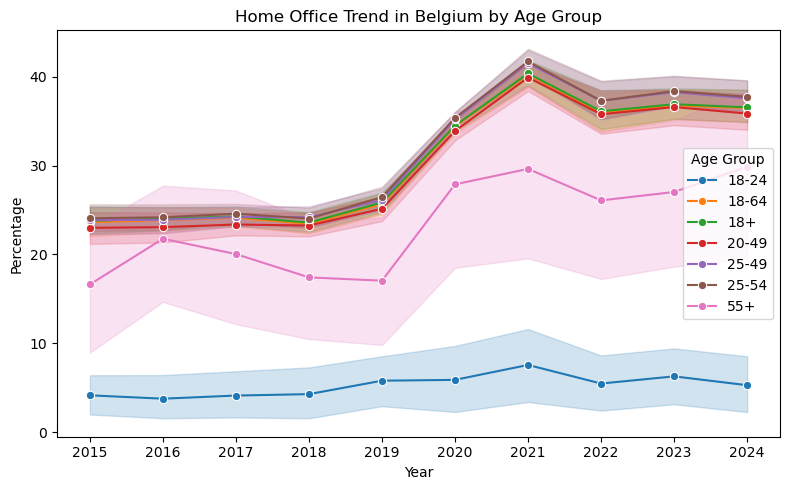

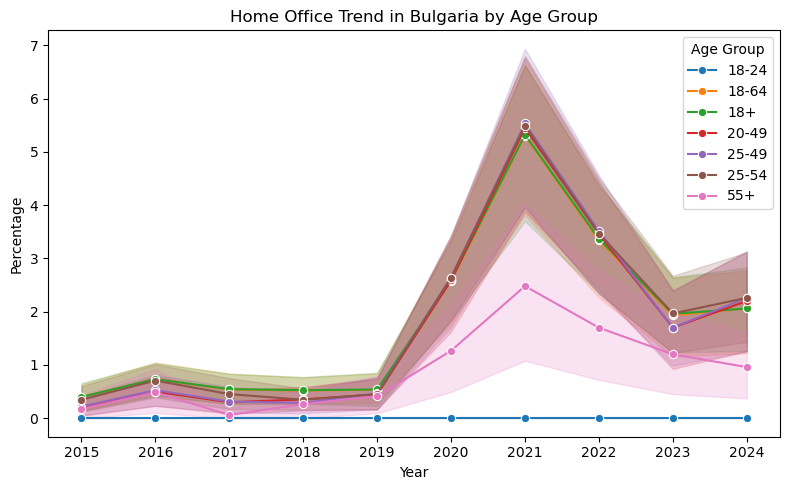

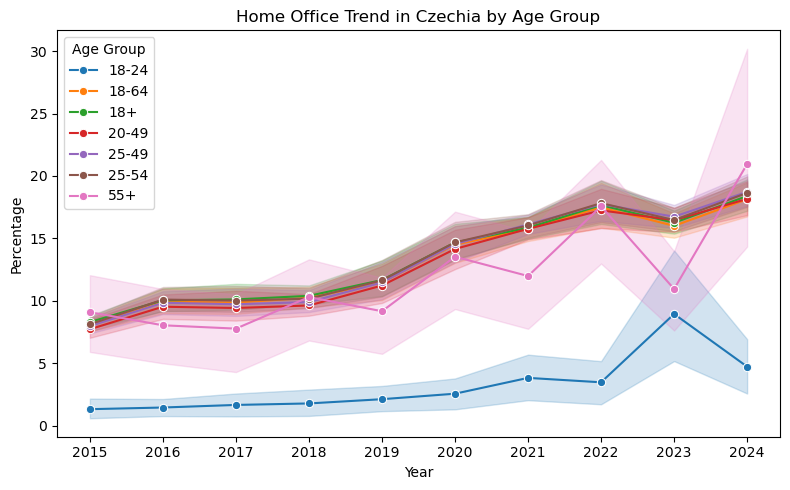

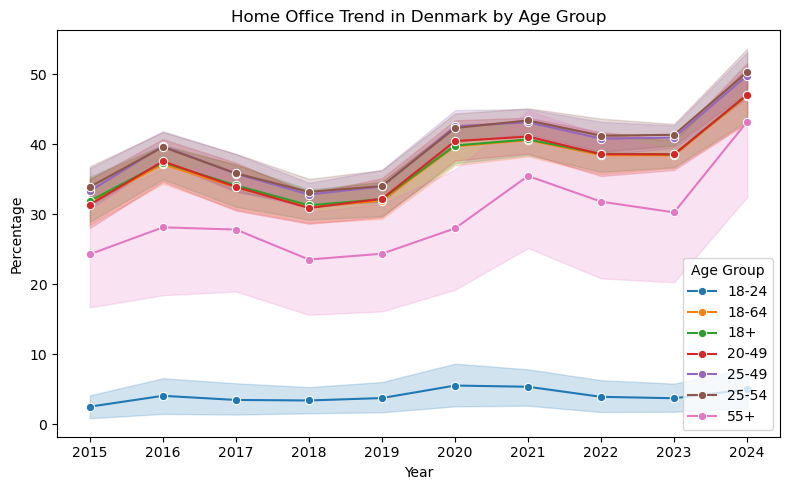

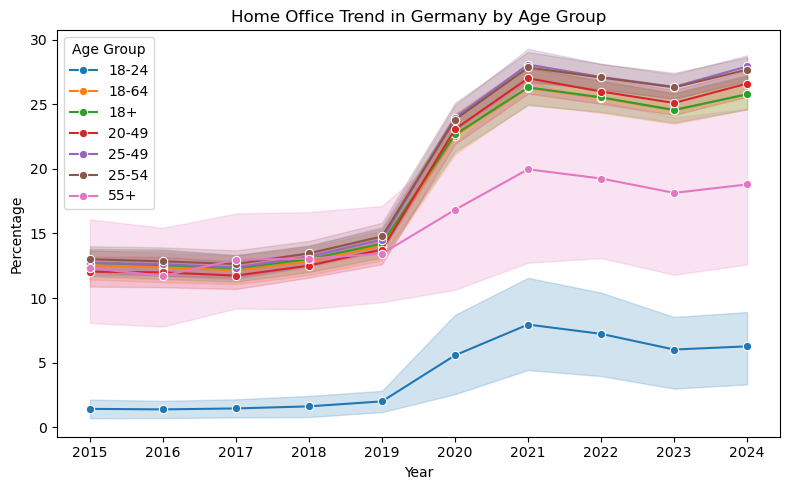

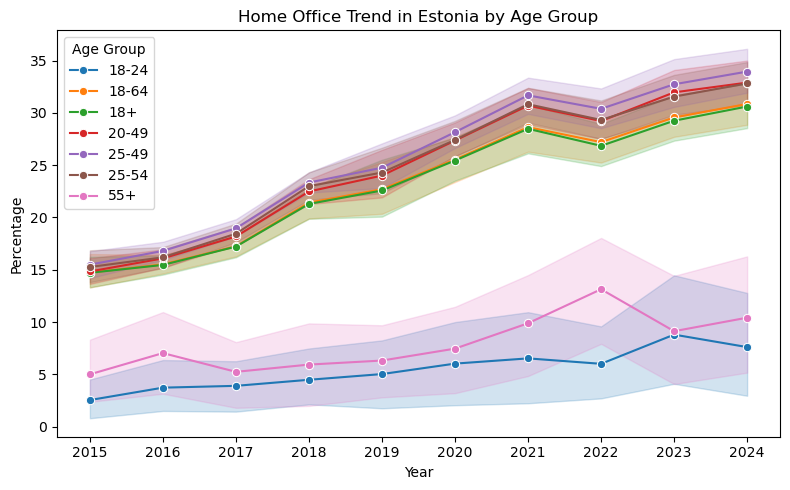

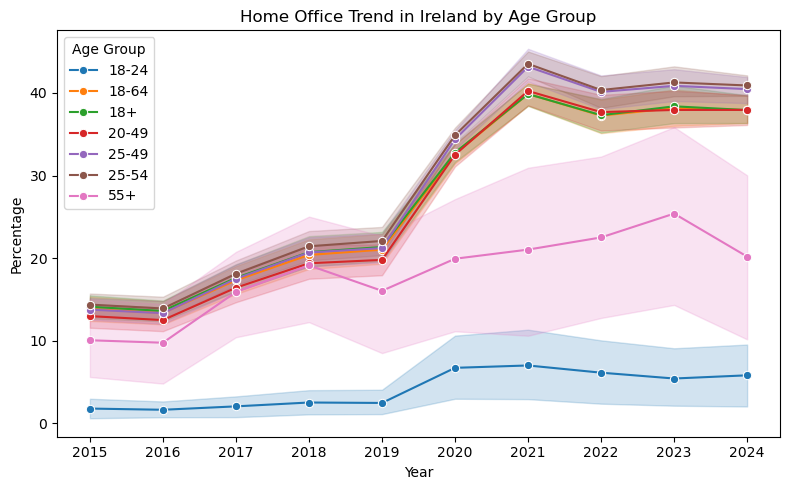

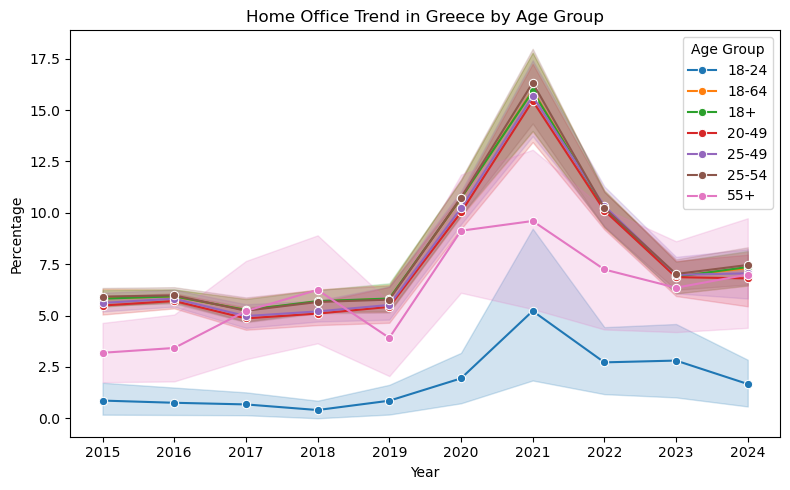

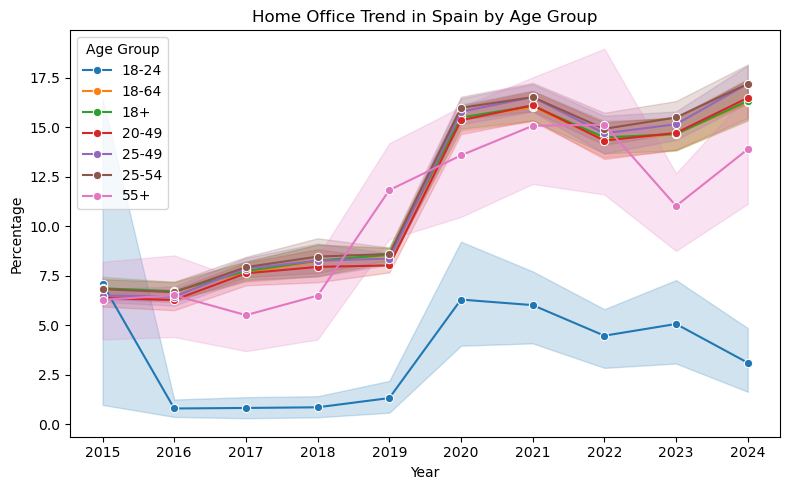

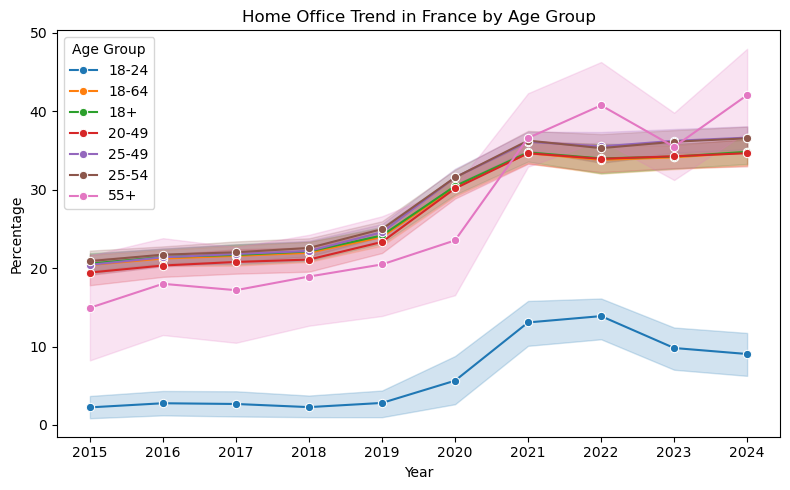

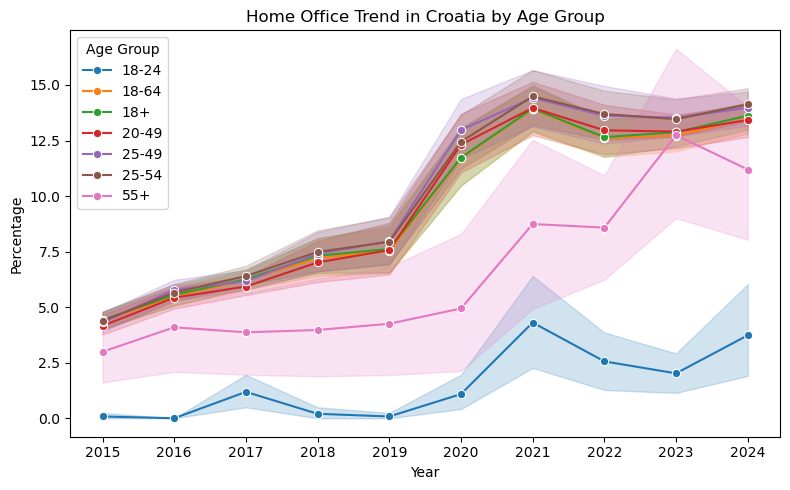

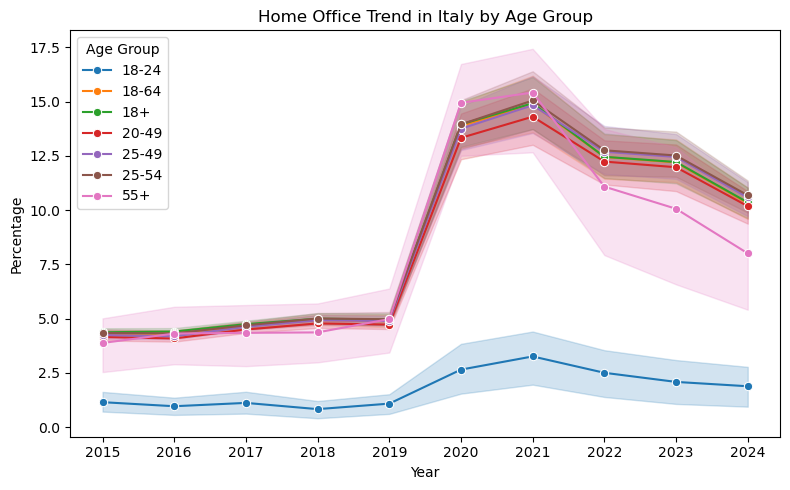

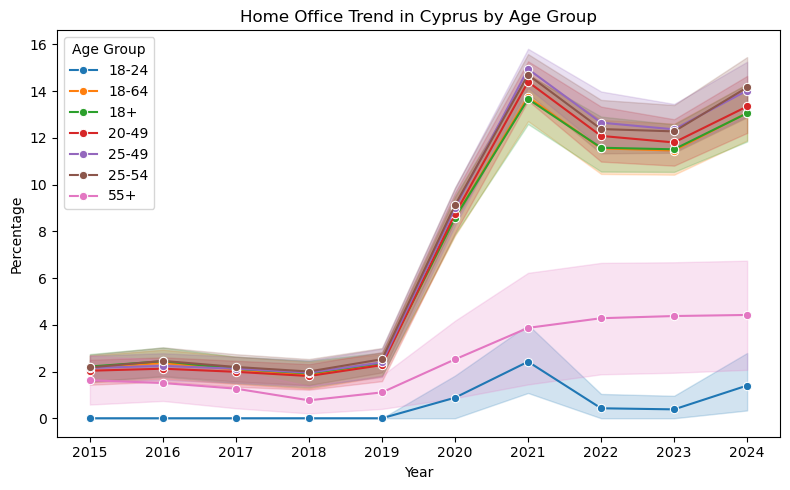

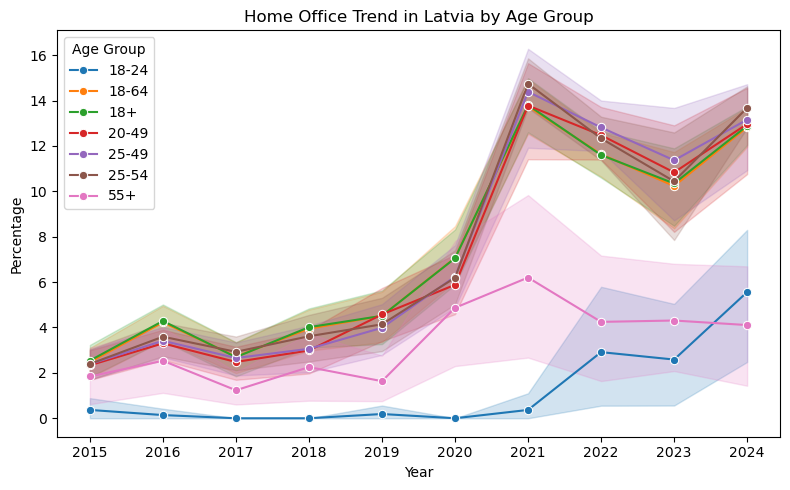

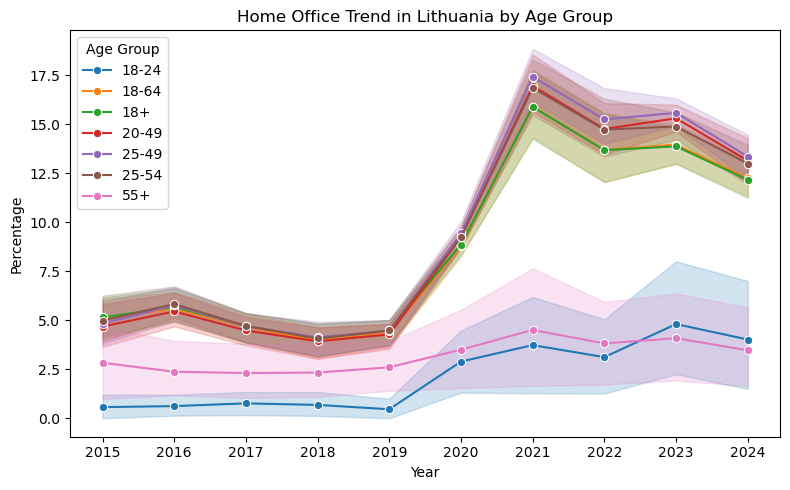

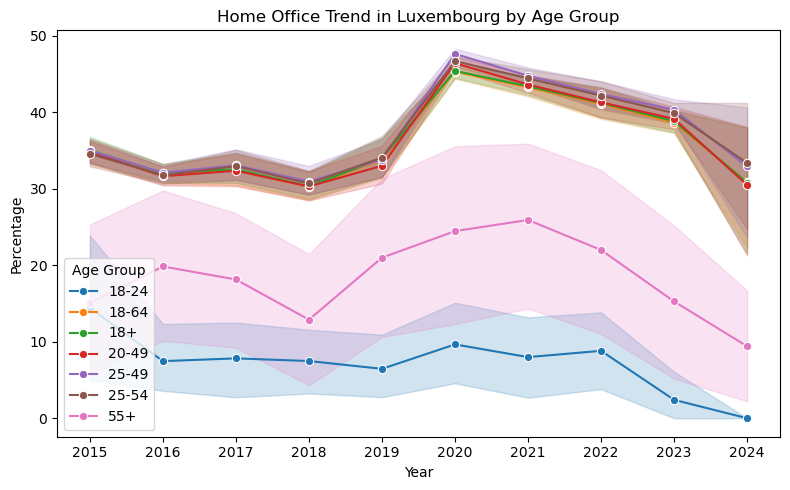

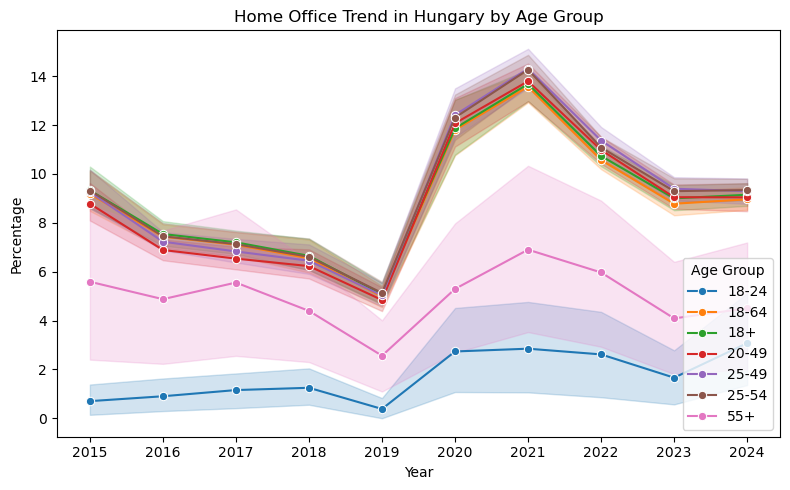

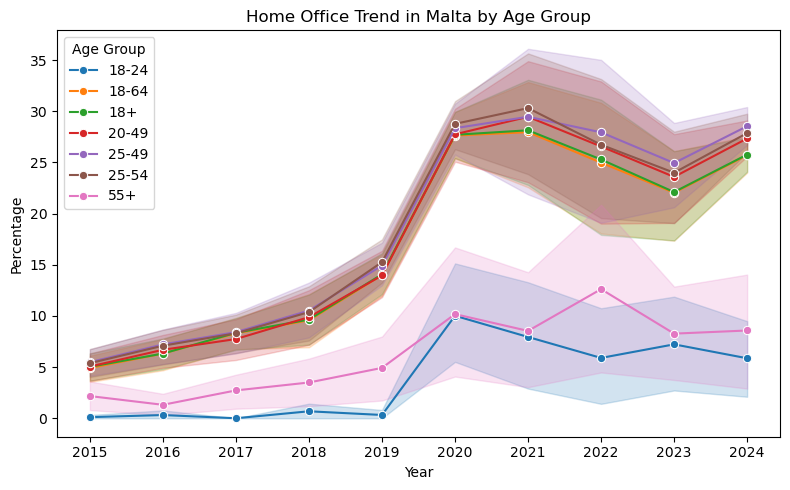

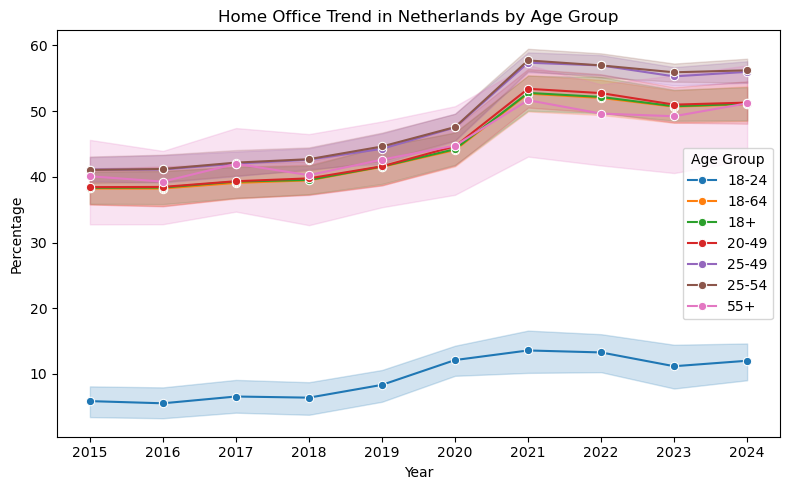

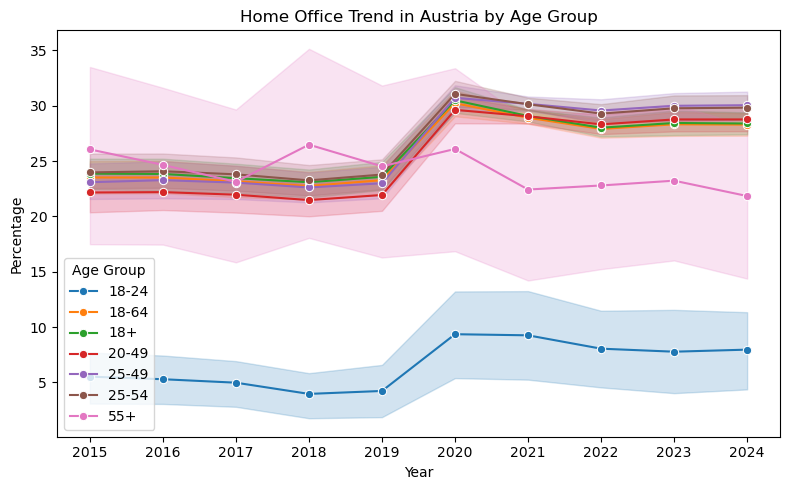

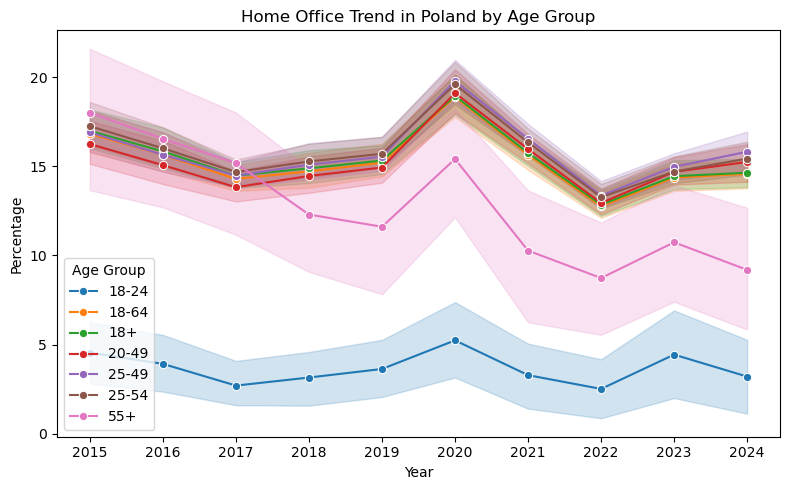

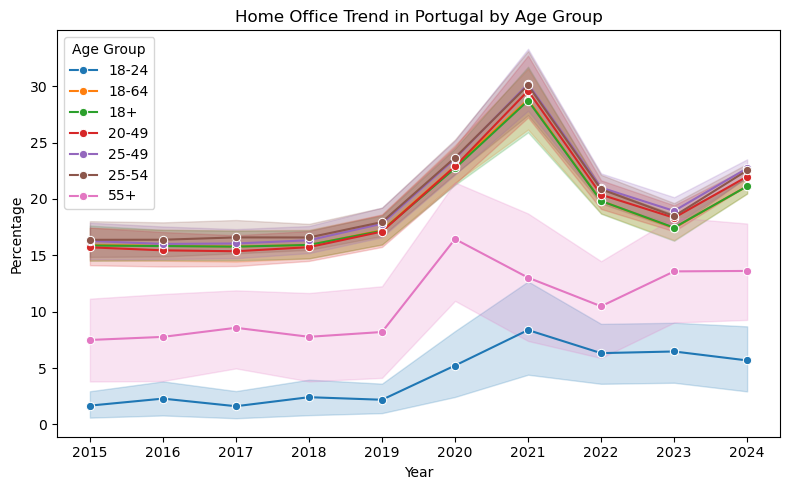

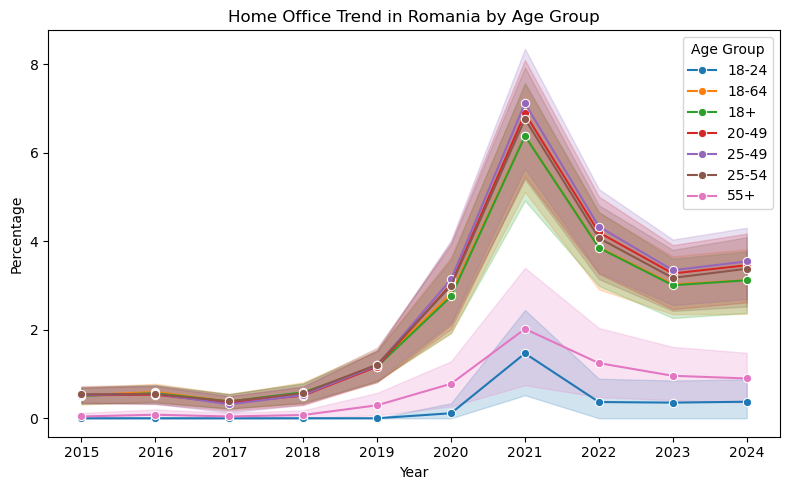

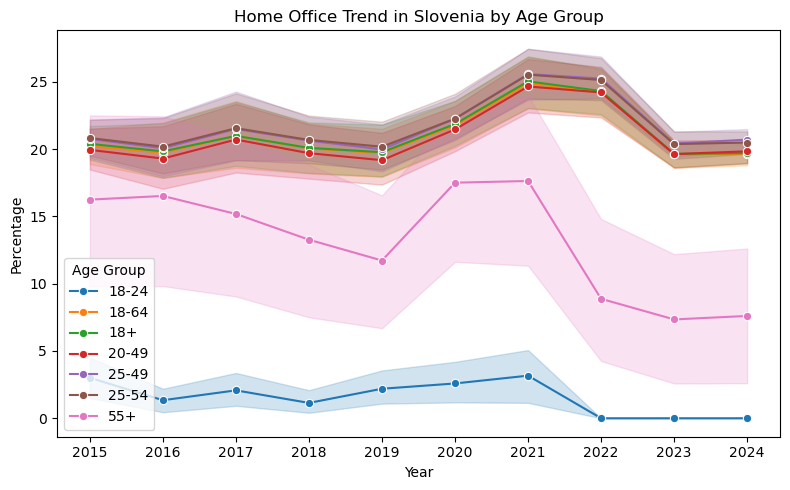

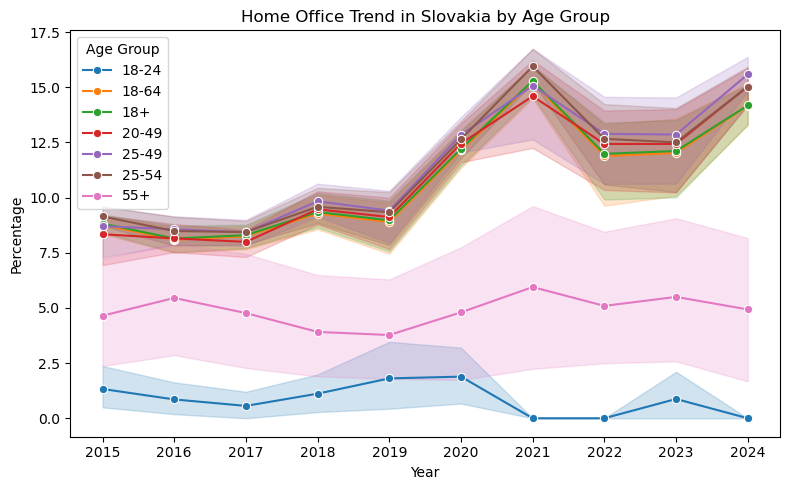

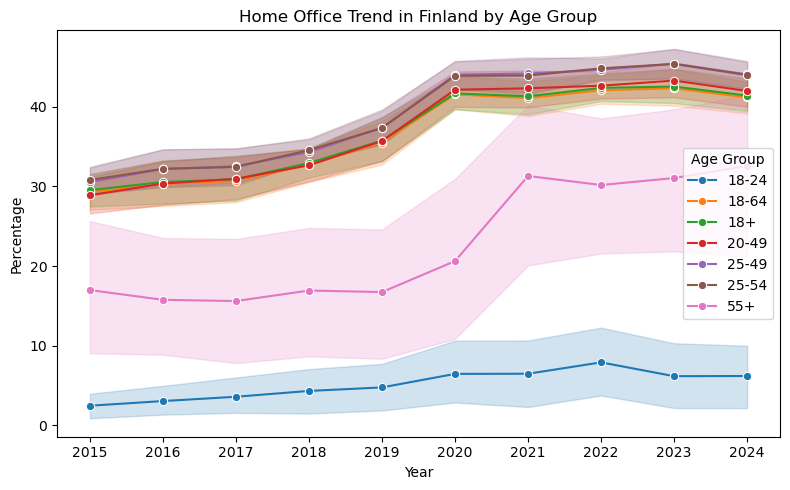

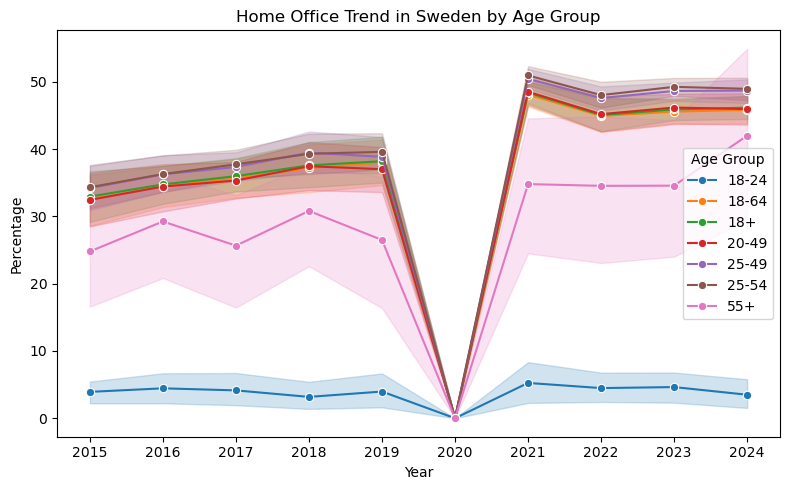

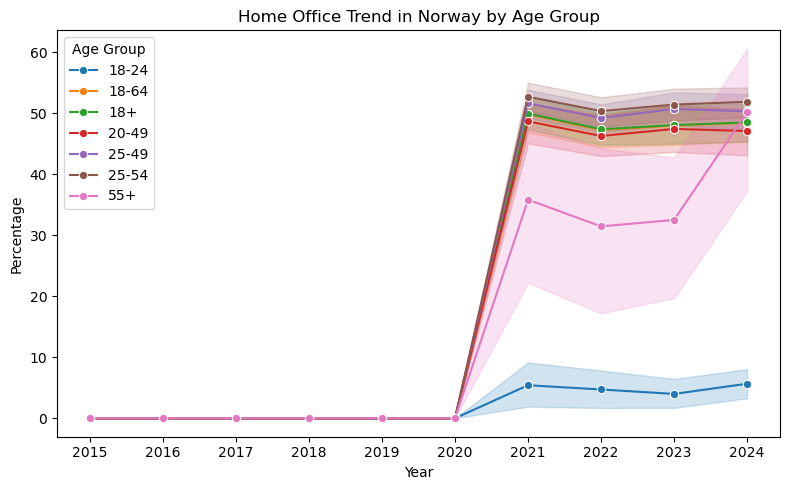

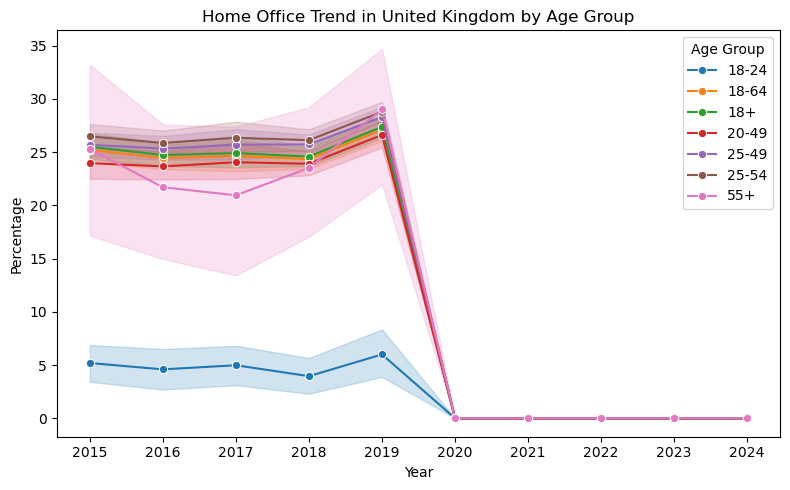

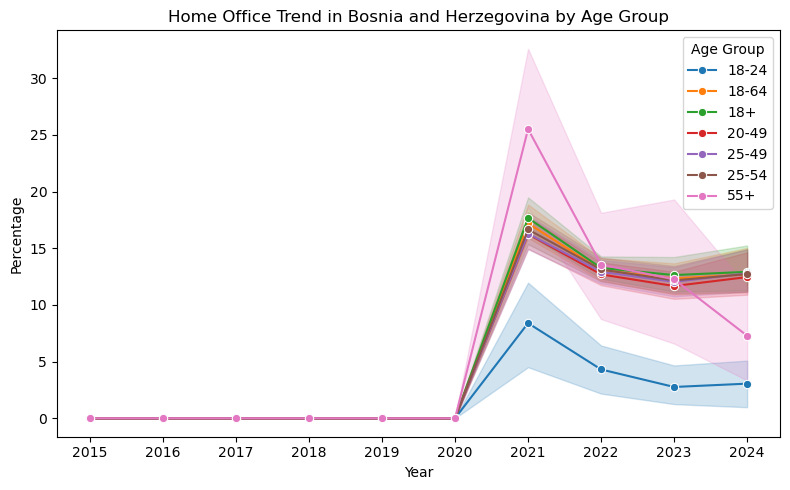

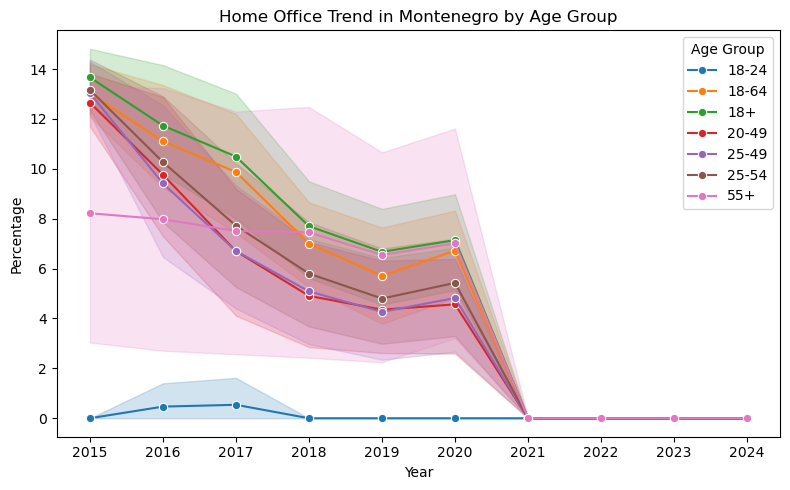

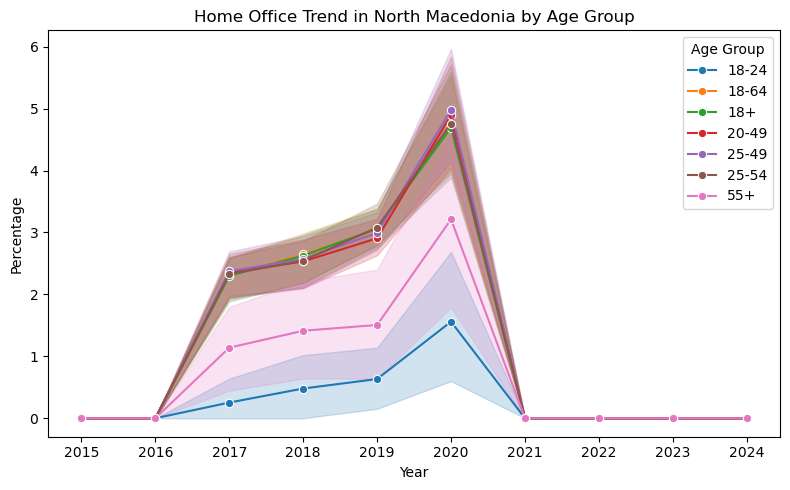

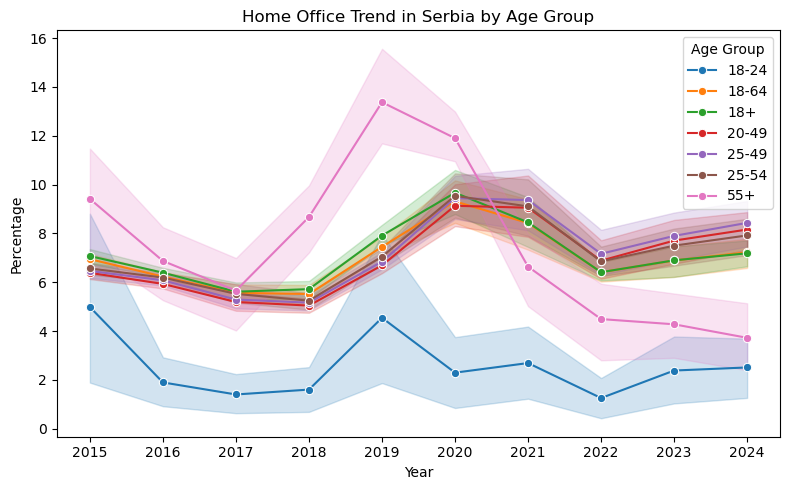

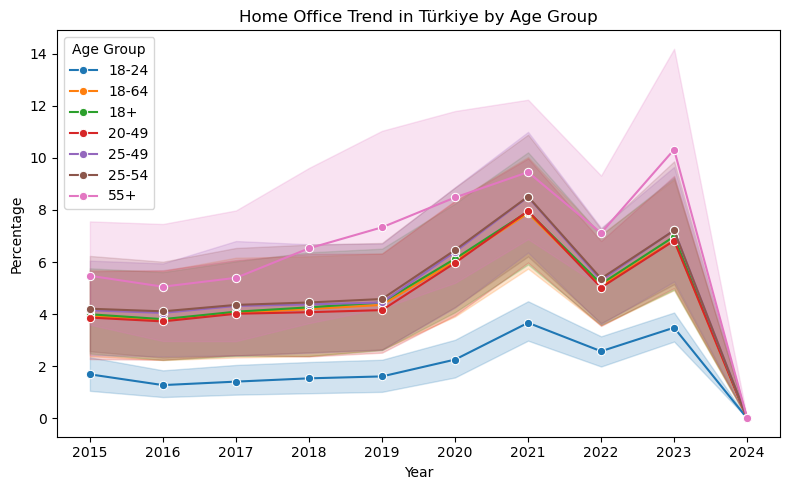

In [334]:
# Plot: one subplot per country, with lines for each age group
age_groups = df_home_office_long["age_group"].unique()
regions = df_home_office_long["region"].unique()

for region in regions:
    subset = df_home_office_long[df_home_office_long["region"] == region]
    
    plt.figure(figsize=(8, 5))
    sns.lineplot(
        data=subset,
        x="year",
        y="%Home_Office",
        hue="age_group",
        marker="o"
    )
    plt.title(f"Home Office Trend in {region} by Age Group")
    plt.ylabel("Percentage")
    plt.xlabel("Year")
    plt.legend(title="Age Group")
    plt.tight_layout()
    plt.show()

What can we see here??

-- you can clearly see COVID Home office measures within the data from 2020-2022

-- when looking at all countries the Home Office prevalence is still higher after COVID compared to before 2019 

-- we can see that age groups 18-24 and 55+ have a lower percentage of home office workers for most countries

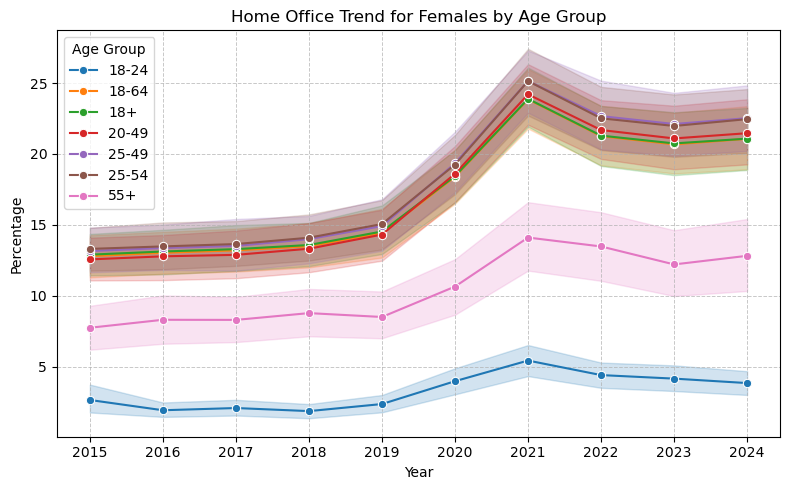

In [341]:
subset = df_home_office_long[df_home_office_long["gender"] == "female"]
    
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=subset,
    x="year",
    y="%Home_Office",
    hue="age_group",
    marker="o"
   )
plt.title(f"Home Office Trend for Females by Age Group")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend(title="Age Group")

plt.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()

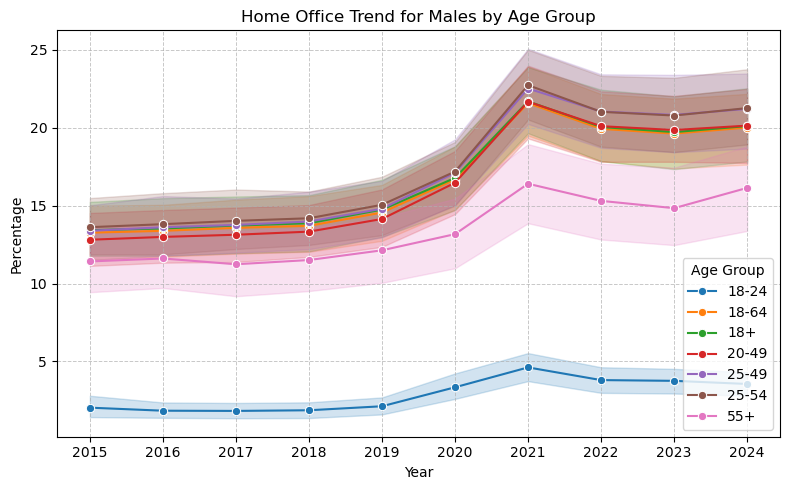

In [340]:
subset = df_home_office_long[df_home_office_long["gender"] == "male"]
    
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=subset,
    x="year",
    y="%Home_Office",
    hue="age_group",
    marker="o"
   )
plt.title(f"Home Office Trend for Males by Age Group")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend(title="Age Group")

plt.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()

**What do we see?**

-- when looking at all EU countries the Home Office trend for male and females seems to be similar

-- age group 18-24 has a much lower percentage overall for HO workers

-- the age group 55+ also seems to have lower overall HO percentages, especially for females

Lets take the 4 Cluster and look at the differences between male/female and ages

In [ ]:
df_home_office

region  2015  2016  2017  2018  2019  \
0     European_Union_27_countries_from_2020   4.5   4.6   4.6   4.7   5.3   
1          Euro_area_20_countries_2015-2022   4.5   4.3   4.6   4.7   5.3   
2                                   Belgium   8.9   8.6   9.3   9.6  10.3   
3                                  Bulgaria   0.0   0.0   0.0   0.0   0.0   
4                                   Czechia   2.7   2.8   3.5   3.9   4.3   
...                                     ...   ...   ...   ...   ...   ...   
3775                 Bosnia and Herzegovina   0.0   0.0   0.0   0.0   0.0   
3776                             Montenegro   0.0   0.0   0.0   0.0   0.0   
3777                        North Macedonia   0.0   0.0   0.0   0.0   0.0   
3778                                 Serbia   0.0   0.0   0.0  14.6  24.6   
3779                                Türkiye   9.2   9.6   9.1  12.8  17.7   

      2020  2021  2022  2023  2024  gender age_group children  
0     10.3  12.4  11.1  10.4  10.0   total     18-24    total  
1     11.1  13.7  12.3  11.0  10.7   total     18-24    total  
2     13.3  16.0  11.9  11.3  11.2   total     18-24    total  
3      0.0   0.0   0.0   0.0   0.0   total     18-24    total  
4      4.8   7.3   6.5  10.2   8.4   total     18-24    total  
...    ...   ...   ...   ...   ...     ...       ...      ...  
3775   0.0   0.0   0.0   0.0   0.0  female       55+       3+  
3776   0.0   0.0   0.0   0.0   0.0  female       55+       3+  
3777   0.0   0.0   0.0   0.0   0.0  female       55+       3+  
3778  18.4   0.0   0.0   0.0   0.0  female       55+       3+  
3779  18.2  14.5   9.6  21.3   0.0  female       55+       3+  

[3780 rows x 14 columns]

In [374]:
df_home_office_cluster_min = df_home_office_cluster.drop(columns=['2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', '2024'])
df_home_office_cluster_min

region  cluster
362                 Belgium        1
363                Bulgaria        0
364                 Czechia        0
365                 Denmark        2
366                 Germany        3
367                 Estonia        3
368                 Ireland        1
369                  Greece        0
370                   Spain        0
371                  France        1
372                 Croatia        0
373                   Italy        0
374                  Cyprus        0
375                  Latvia        0
376               Lithuania        0
377              Luxembourg        2
378                 Hungary        0
379                   Malta        3
380             Netherlands        2
381                 Austria        1
382                  Poland        3
383                Portugal        3
384                 Romania        0
385                Slovenia        3
386                Slovakia        0
387                 Finland        2
388                  Sweden        2
389                  Norway        0
390          United Kingdom        3
391  Bosnia and Herzegovina        0
392              Montenegro        0
393         North Macedonia        0
394                  Serbia        0
395                 Türkiye        0

In [381]:
# join the home office cluster data with the home office data

df_home_office_cluster_joined = df_home_office_cluster_min.merge(df_home_office, on=["region"], how="right")

In [382]:
df_home_office_cluster_joined.columns

Index(['region', 'cluster', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', '2024', 'gender', 'age_group', 'children'],
      dtype='object')

In [383]:
df_home_office_cluster_joined

region  cluster  2015  2016  2017  2018  \
0     European_Union_27_countries_from_2020      NaN   4.5   4.6   4.6   4.7   
1          Euro_area_20_countries_2015-2022      NaN   4.5   4.3   4.6   4.7   
2                                   Belgium      1.0   8.9   8.6   9.3   9.6   
3                                  Bulgaria      0.0   0.0   0.0   0.0   0.0   
4                                   Czechia      0.0   2.7   2.8   3.5   3.9   
...                                     ...      ...   ...   ...   ...   ...   
3775                 Bosnia and Herzegovina      0.0   0.0   0.0   0.0   0.0   
3776                             Montenegro      0.0   0.0   0.0   0.0   0.0   
3777                        North Macedonia      0.0   0.0   0.0   0.0   0.0   
3778                                 Serbia      0.0   0.0   0.0   0.0  14.6   
3779                                Türkiye      0.0   9.2   9.6   9.1  12.8   

      2019  2020  2021  2022  2023  2024  gender age_group children  
0      5.3  10.3  12.4  11.1  10.4  10.0   total     18-24    total  
1      5.3  11.1  13.7  12.3  11.0  10.7   total     18-24    total  
2     10.3  13.3  16.0  11.9  11.3  11.2   total     18-24    total  
3      0.0   0.0   0.0   0.0   0.0   0.0   total     18-24    total  
4      4.3   4.8   7.3   6.5  10.2   8.4   total     18-24    total  
...    ...   ...   ...   ...   ...   ...     ...       ...      ...  
3775   0.0   0.0   0.0   0.0   0.0   0.0  female       55+       3+  
3776   0.0   0.0   0.0   0.0   0.0   0.0  female       55+       3+  
3777   0.0   0.0   0.0   0.0   0.0   0.0  female       55+       3+  
3778  24.6  18.4   0.0   0.0   0.0   0.0  female       55+       3+  
3779  17.7  18.2  14.5   9.6  21.3   0.0  female       55+       3+  

[3780 rows x 15 columns]

In [ ]:
# filter out the EU rows

df_home_office_cluster_joined = df_home_office_cluster_joined[~df_home_office_cluster_joined["region"].isin(['European_Union_27_countries_from_2020', "Euro_area_20_countries_2015-2022"])]

df_home_office_cluster_joined

region  cluster  2015  2016  2017  2018  2019  2020  \
2                    Belgium      1.0   8.9   8.6   9.3   9.6  10.3  13.3   
3                   Bulgaria      0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4                    Czechia      0.0   2.7   2.8   3.5   3.9   4.3   4.8   
5                    Denmark      2.0   5.8   9.3   8.1   7.2   8.1  12.0   
6                    Germany      3.0   2.9   2.7   2.9   3.3   3.7  12.1   
...                      ...      ...   ...   ...   ...   ...   ...   ...   
3775  Bosnia and Herzegovina      0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3776              Montenegro      0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3777         North Macedonia      0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3778                  Serbia      0.0   0.0   0.0   0.0  14.6  24.6  18.4   
3779                 Türkiye      0.0   9.2   9.6   9.1  12.8  17.7  18.2   

      2021  2022  2023  2024  gender age_group children  
2     16.0  11.9  11.3  11.2   total     18-24    total  
3      0.0   0.0   0.0   0.0   total     18-24    total  
4      7.3   6.5  10.2   8.4   total     18-24    total  
5     10.4   8.6   7.9  10.6   total     18-24    total  
6     15.0  13.2  11.3  11.4   total     18-24    total  
...    ...   ...   ...   ...     ...       ...      ...  
3775   0.0   0.0   0.0   0.0  female       55+       3+  
3776   0.0   0.0   0.0   0.0  female       55+       3+  
3777   0.0   0.0   0.0   0.0  female       55+       3+  
3778   0.0   0.0   0.0   0.0  female       55+       3+  
3779  14.5   9.6  21.3   0.0  female       55+       3+  

[3570 rows x 15 columns]

Now we have the long format of the home office data with each country having their specific cluster number added - which will help us visualize

In [399]:
# List of year columns (adjust if needed)
year_cols = [str(y) for y in range(2015, 2025)]

# Melt the dataframe to long format for easier plotting
df_long = df_home_office_cluster_joined.melt(
    id_vars=["region", "cluster", "gender"],
    value_vars=year_cols,
    var_name="year",
    value_name="percentage"
)

# Convert year column to integer for sorting and plotting
#df_home_office_cluster_joined["year"] = df_home_office_cluster_joined["year"].astype(int)

df_long = df_long[~df_long["gender"].isin(['total'])]
df_long

region  cluster  gender  year  percentage
1190                  Belgium      1.0    male  2015         7.9
1191                 Bulgaria      0.0    male  2015         0.0
1192                  Czechia      0.0    male  2015         1.9
1193                  Denmark      2.0    male  2015         6.7
1194                  Germany      3.0    male  2015         2.9
...                       ...      ...     ...   ...         ...
35695  Bosnia and Herzegovina      0.0  female  2024         0.0
35696              Montenegro      0.0  female  2024         0.0
35697         North Macedonia      0.0  female  2024         0.0
35698                  Serbia      0.0  female  2024         0.0
35699                 Türkiye      0.0  female  2024         0.0

[23800 rows x 5 columns]

C:\Users\Olivia\AppData\Local\Temp\ipykernel_17892\204608506.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


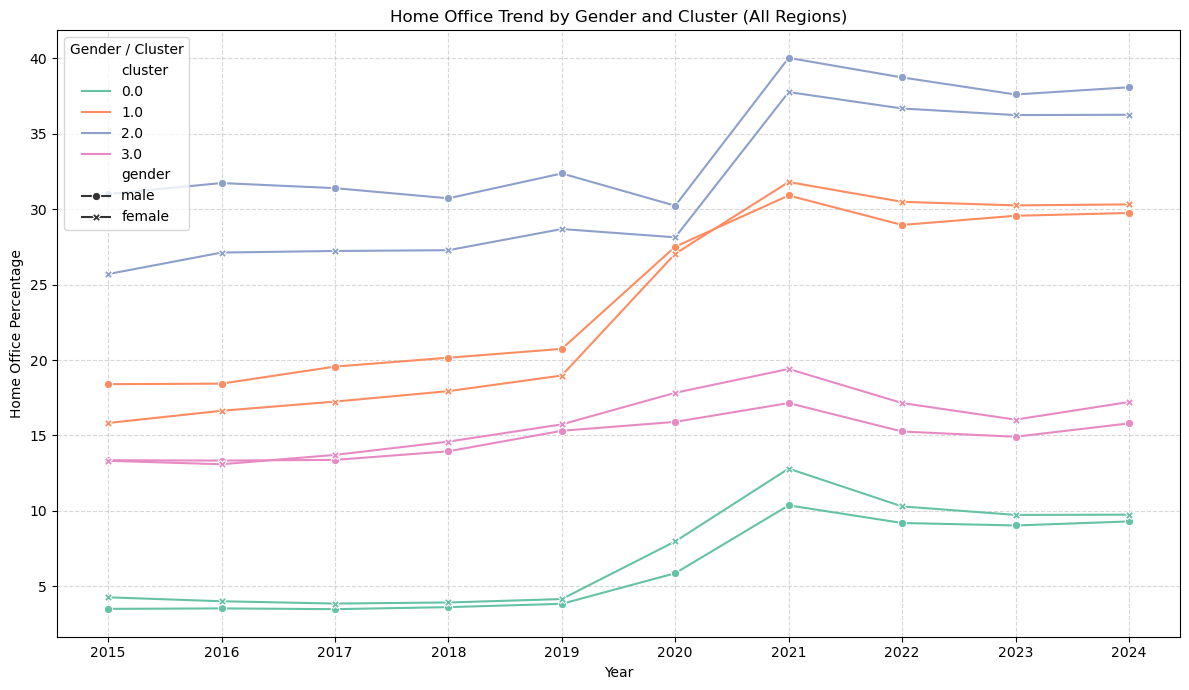

In [ ]:

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df_long,
    x="year",
    y="percentage",
    hue="cluster",
    style="gender",
    markers=True,
    dashes=False,
    ci=None,
    palette="Set2" 
)

plt.title("Home Office Trend by Gender and Cluster (All Regions)")
plt.ylabel("Home Office Percentage")
plt.xlabel("Year")
plt.legend(title="Gender / Cluster")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

**What do we see??**

-- for the Home Office trends for male and females we can see that with COVID for cluster 0,1,3 more females stayed at home, however this trend was again reduced after Covid measures

-- only for cluster 2 with the highes HO percentages the males have a higher percentage of Home Office than the females

Lets have a look at the different age groups

In [410]:
# List of year columns (adjust if needed)
year_cols = [str(y) for y in range(2015, 2025)]

# Melt the dataframe to long format for easier plotting
df_long_age = df_home_office_cluster_joined.melt(
    id_vars=["region", "cluster", "age_group"],
    value_vars=year_cols,
    var_name="year",
    value_name="percentage"
)

# Convert year column to integer for sorting and plotting
#df_home_office_cluster_joined["year"] = df_home_office_cluster_joined["year"].astype(int)

#df_long_age = df_long_age[df_long_age["age_group"].isin(['18+'])]
df_long_age

region  cluster age_group  year  percentage
0                     Belgium      1.0     18-24  2015         8.9
1                    Bulgaria      0.0     18-24  2015         0.0
2                     Czechia      0.0     18-24  2015         2.7
3                     Denmark      2.0     18-24  2015         5.8
4                     Germany      3.0     18-24  2015         2.9
...                       ...      ...       ...   ...         ...
35695  Bosnia and Herzegovina      0.0       55+  2024         0.0
35696              Montenegro      0.0       55+  2024         0.0
35697         North Macedonia      0.0       55+  2024         0.0
35698                  Serbia      0.0       55+  2024         0.0
35699                 Türkiye      0.0       55+  2024         0.0

[35700 rows x 5 columns]

C:\Users\Olivia\AppData\Local\Temp\ipykernel_17892\2329415306.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


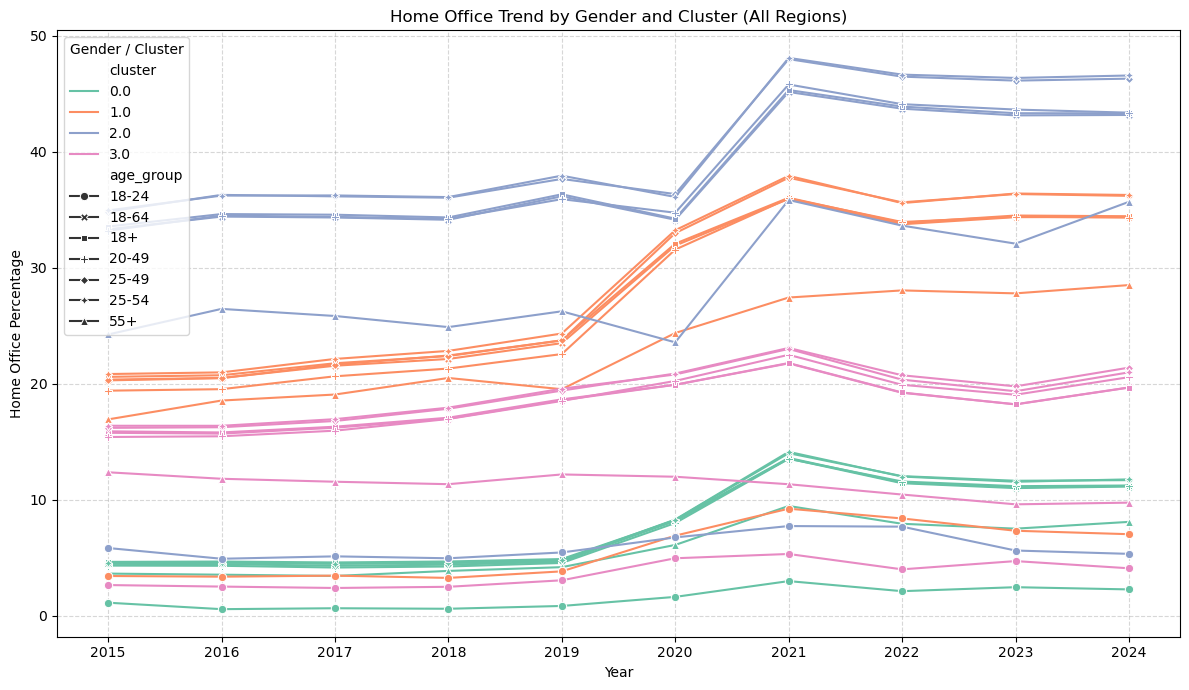

In [412]:
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df_long_age,
    x="year",
    y="percentage",
    hue="cluster",
    style="age_group",
    markers=True,
    dashes=False,
    ci=None,
    palette="Set2"  # Use a color palette that distinguishes clusters well
)

plt.title("Home Office Trend by Gender and Cluster (All Regions)")
plt.ylabel("Home Office Percentage")
plt.xlabel("Year")
plt.legend(title="Gender / Cluster")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

This is too busy - we need to make one plot for each cluster

C:\Users\Olivia\AppData\Local\Temp\ipykernel_17892\3526854945.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


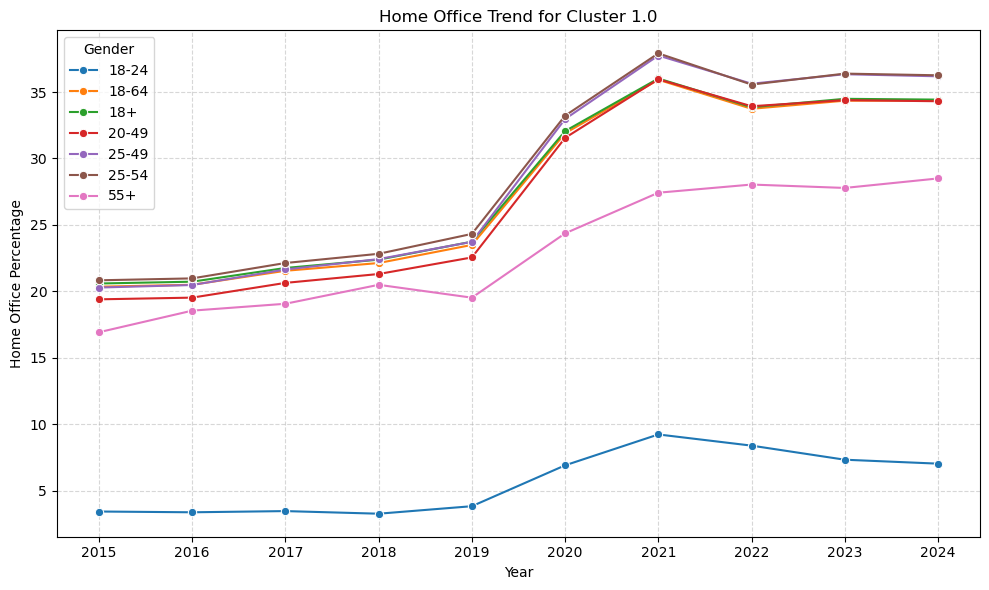

C:\Users\Olivia\AppData\Local\Temp\ipykernel_17892\3526854945.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


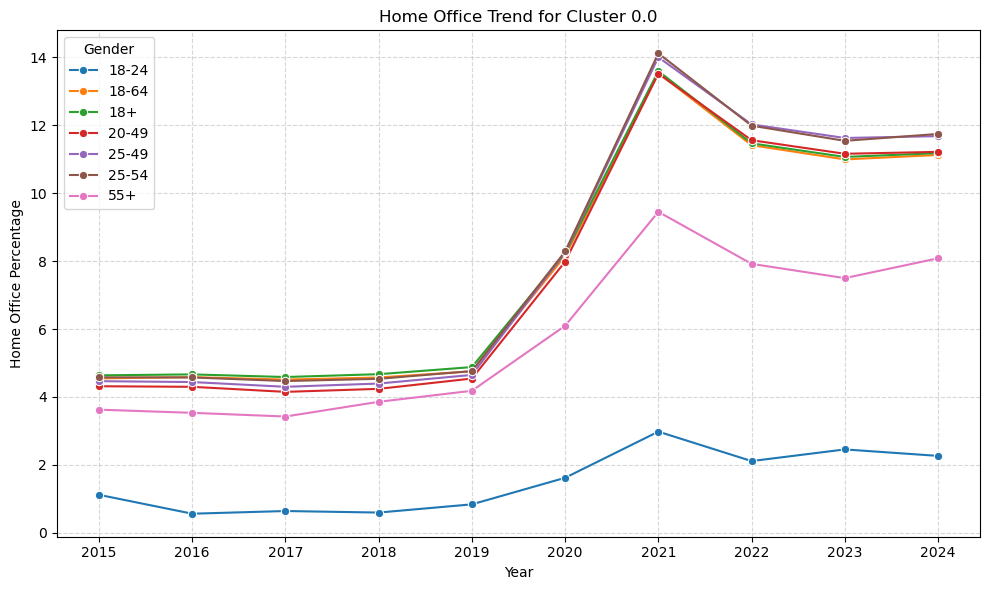

C:\Users\Olivia\AppData\Local\Temp\ipykernel_17892\3526854945.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


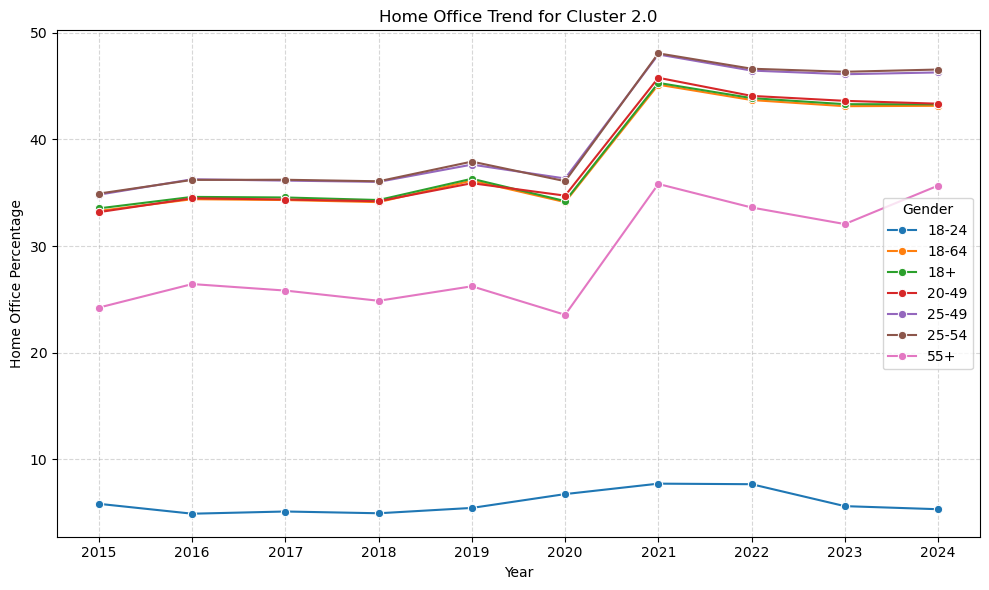

C:\Users\Olivia\AppData\Local\Temp\ipykernel_17892\3526854945.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


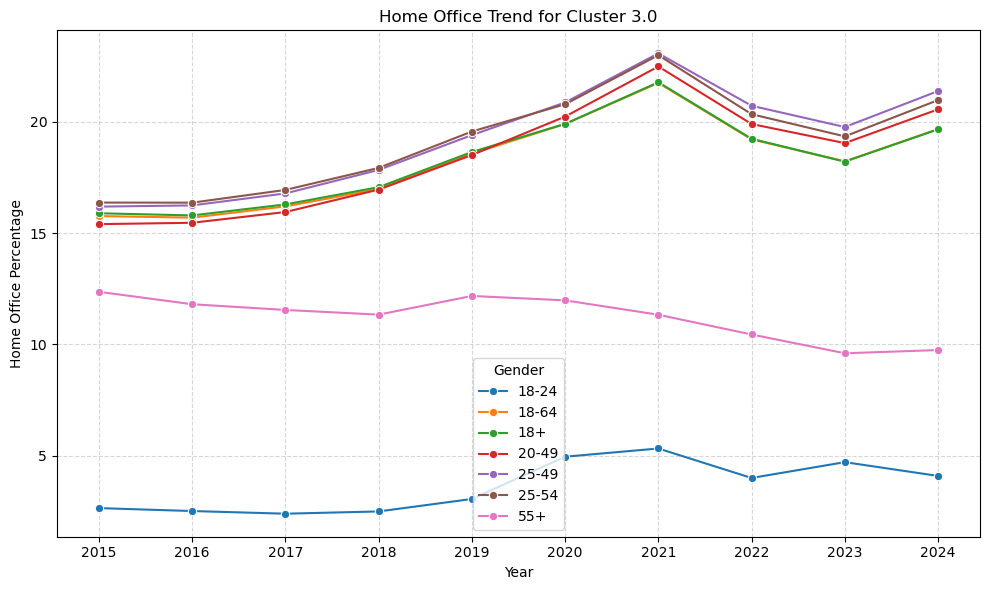

In [415]:
clusters = df_long_age["cluster"].unique()

for cluster_id in clusters:
    df_cluster = df_long_age[df_long_age["cluster"] == cluster_id]
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=df_cluster,
        x="year",
        y="percentage",
        hue="age_group",
        marker="o",
        ci=None
    )
    
    plt.title(f"Home Office Trend for Cluster {cluster_id}")
    plt.ylabel("Home Office Percentage")
    plt.xlabel("Year")
    plt.legend(title="Gender")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

**What do we see??**

-- especially age groups 25-54 have higher percentages of Home Office (probably due to child support/family)

-- age groups 18-24 and 55+ have much lower prevalances for Home Office 